In [2]:
#import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [3]:
T = pd.read_csv('../TOST_data/average_properties.txt',
            sep='\t',index_col=0,na_values=-99,
            dtype={'WEIGHT_GRAMS': float,
                   'GEST_AGE_DAYS':float,
                   'DELTA_SEC_MEASURE':float,
                   'MED_SPO2':float,
                   'MED_PI':float,
                   'MED_PR':float})

## Example of selections

In [4]:
T[(T['BABY_IDS']=='FMC003' )&(T['PHN']==False)]

,BABY_IDS,GENDER,WEIGHT_GRAMS,GEST_AGE_DAYS,DELIVERY,BIRTH_DATE,FILE,DELTA_SEC_MEASURE,MED_SPO2,MED_PR,MED_PI,PHN,WRIST,FOOT
0,FMC003,Male,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,58400.0,99.0,117.0,NaN,False,False,True
1,FMC003,Male,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,58499.0,94.0,113.0,0.7,False,True,False


### You can combine different selection!
This is very powerful!!

In [5]:
sel1 = (T['BABY_IDS']=='FMC003' )
sel2 = (T['PHN']==False)
sel3 = (T['WRIST']==True)

In [6]:
T[sel1 & sel2 & sel3]

,BABY_IDS,GENDER,WEIGHT_GRAMS,GEST_AGE_DAYS,DELIVERY,BIRTH_DATE,FILE,DELTA_SEC_MEASURE,MED_SPO2,MED_PR,MED_PI,PHN,WRIST,FOOT
1,FMC003,Male,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,58499.0,94.0,113.0,0.7,False,True,False


# Distribution of PR for different gestational age

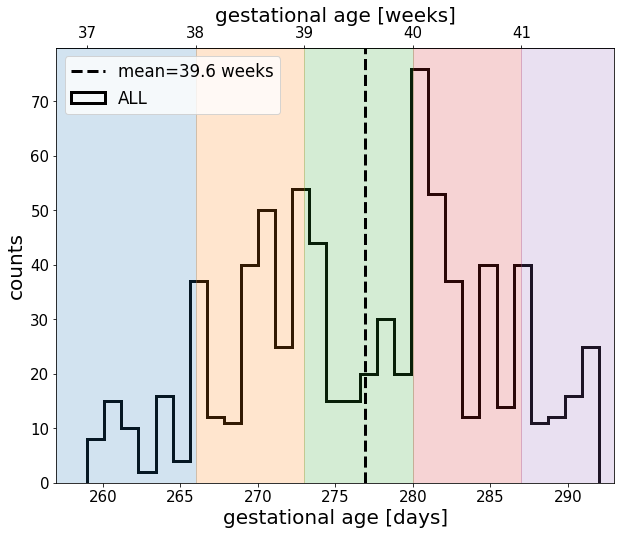

In [7]:
fig,ax = plt.subplots(figsize=(10,8))
ax.hist(T['GEST_AGE_DAYS'],bins=30,histtype='step',lw=3,color='k',label='ALL')
ax.axvline(np.mean(T['GEST_AGE_DAYS']),color='k',ls='dashed',lw=3,label='mean=%.1f weeks'%(np.mean(T['GEST_AGE_DAYS'])/7))
ax.set_xlabel('gestational age [days]')
ax.set_ylabel('counts')

#stat, p = ss.ttest_ind(girls.gestational_age_days, boys.gestational_age_days)
#print('t=%.3f, p=%.3f' % (stat, p))
#plt.title('ALL deliveries p-value = '+str(round(p,3)))

#plt.axvline(38*7,ls='dotted',lw=3,color='red')
#plt.axvline(39*7,ls='dotted',lw=3,color='red')
#plt.axvline(40*7,ls='dotted',lw=3,color='red')
#plt.axvline(41*7,ls='dotted',lw=3,color='red')

ax.axvspan(35*7, 38*7, alpha=0.2, color='C0')
ax.axvspan(38*7, 39*7, alpha=0.2, color='C1')
ax.axvspan(39*7, 40*7, alpha=0.2, color='C2')
ax.axvspan(40*7, 41*7, alpha=0.2, color='C3')
ax.axvspan(41*7, 43*7, alpha=0.2, color='C4')

#color='green')
#color='red')
#color='orange')
#color='blue')
#color='magenta')

secax = ax.secondary_xaxis('top', functions=(days_to_week, weeks_to_days))
secax.set_xlabel('gestational age [weeks]')

plt.xlim(257,293)

plt.legend(fontsize='small')
plt.show()

### Create the selection for the bins above

In [8]:
slots = [0.,38*7,39*7,40*7,41*7,500.]

In [9]:
sel = []
for i in range(len(slots)-1):
    sel.append((T['GEST_AGE_DAYS']>= slots[i])&(T['GEST_AGE_DAYS']< slots[i+1]))


In [10]:
print('MEAN VALUES')
print('##################################')
print(T[sel[4]].mean())

MEAN VALUES
##################################
WEIGHT_GRAMS           3735.432692
GEST_AGE_DAYS           288.884615
DELTA_SEC_MEASURE    113606.951923
MED_SPO2                 95.365385
MED_PR                  120.798077
MED_PI                    1.120833
PHN                       0.211538
WRIST                     0.490385
FOOT                      0.509615
dtype: float64


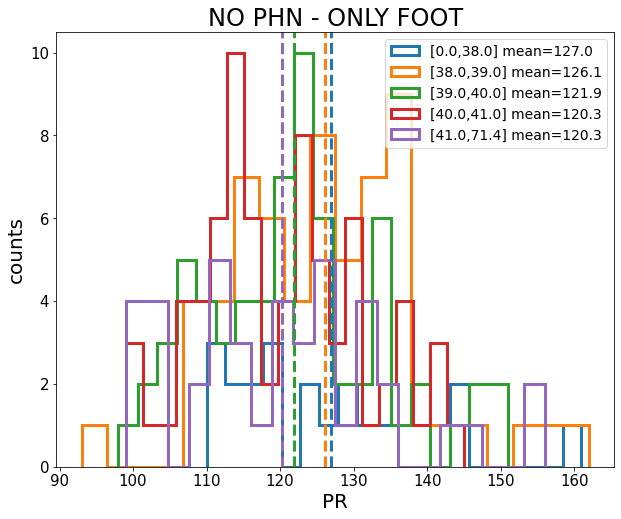

In [11]:
plt.figure(figsize=(10,8))
for i in range(len(sel)):
    data = T['MED_PR'][sel[i] & (T['MED_PR']>10)& (T['PHN']==0) & (T['FOOT']==1)] # 
    plt.hist(data,bins=20,histtype='step',color='C%i'%i,lw=3,label='[%.1f,%.1f] mean=%.1f'%(slots[i]/7.,slots[i+1]/7,np.mean(data)))
    plt.axvline(np.mean(data),color='C%i'%i,ls='dashed',lw=3)
plt.xlabel('PR')
plt.ylabel('counts')
plt.legend(fontsize='x-small')
plt.title('NO PHN - ONLY FOOT')
plt.show()

In [12]:
def plot_hist_split(prop='MED_PR',select=((T['MED_PR']>10)& (T['PHN']==0) & (T['FOOT']==1)),running_sel=sel,slots=np.array(slots)/7.):
    fig = plt.figure(figsize=(10,8))
    for i in range(len(running_sel)):
        data = T[prop][running_sel[i] & select]  
        plt.hist(data,bins=20,histtype='step',color='C%i'%i,lw=3,label='[%.1f,%.1f] mean=%.1f'%(slots[i],slots[i+1],np.mean(data)))
        plt.axvline(np.mean(data),color='C%i'%i,ls='dashed',lw=3)
    plt.xlabel(prop)
    plt.ylabel('counts')
    plt.legend(fontsize='x-small')
    #plt.title('NO PHN - ONLY FOOT')
    return fig


In [13]:
def plot_graph_split(prop='MED_PR',select=((T['MED_PR']>10)& (T['PHN']==0) & (T['FOOT']==1)),running_sel=sel,slots=np.array(slots)/7.,running_prop='GESTATIONAL_AGE',txt_y=100,txt_x=38,conversion=1/7.):
    fig = plt.figure(figsize=(10,8))
    y = []
    x = []
    xerr = []
    yerr = []

    for i in range(len(running_sel)):
        tot_sel = running_sel[i] & select
        data = T[prop][tot_sel]  
        
        if i==0:
            data_first = data
        elif i ==len(running_sel)-1:
            data_last = data
        
        y.append(np.mean(data))
        
        
        x.append(np.mean(T[running_prop][tot_sel])*conversion)
        #xerr.append(np.std(T[running_prop][tot_sel]/7.)/np.sqrt(len(data)))
        
        
        yerr.append(np.std(data))#/np.sqrt(len(data)) )
        #yerr.append(ss.iqr(data) )

        
        #plt.hist(data,bins=20,histtype='step',color='C%i'%i,lw=3,label='[%.1f,%.1f] mean=%.1f'%(slots[i],slots[i+1],np.mean(data)))
        #plt.axvline(np.mean(data),color='C%i'%i,ls='dashed',lw=3)
        print(len(data))
        #print(len(T[running_prop][tot_sel]))
    x = np.array(x)
    y = np.array(y)
    #xerr = np.array(xerr)
    yerr = np.array(yerr)
    
    #98,140
    plt.text(txt_x,txt_y,'difference extremes = %.2f, p-value %.6f'%(np.mean(data_first)-np.mean(data_last),ss.ttest_ind(data_first,data_last)[1]))
    
    #plt.errorbar(x,y,xerr=xerr,yerr=yerr,color='k',lw=5)
    plt.errorbar(x,y,yerr=yerr,color='k',lw=5)
    plt.plot(x,y,".",markersize=30,color='k')

    plt.xlabel(running_prop)
    plt.ylabel(prop)
    #plt.legend(fontsize='x-small')
    #plt.title('NO PHN - ONLY FOOT')
    return fig


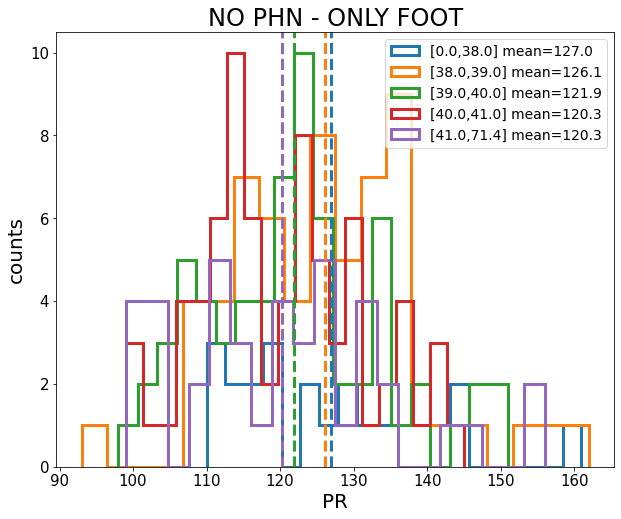

In [14]:
plot_hist_split('MED_PR',select=(T['MED_PR']>10)& (T['PHN']==0) & (T['FOOT']==1))
plt.xlabel('PR')
plt.title('NO PHN - ONLY FOOT')
plt.show()

24
69
67
79
40


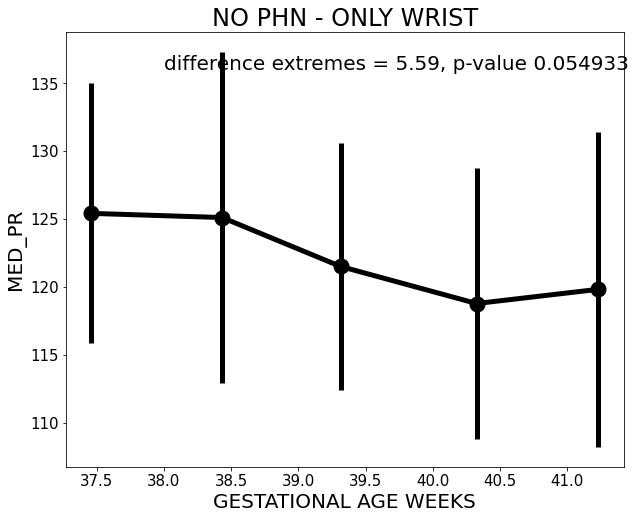

In [15]:
plot_graph_split('MED_PR',select=(T['MED_PR']>10)& (T['PHN']==0) & (T['WRIST']==1),running_prop='GEST_AGE_DAYS',txt_y=136)
plt.xlabel('GESTATIONAL AGE WEEKS')
plt.title('NO PHN - ONLY WRIST')
plt.show()

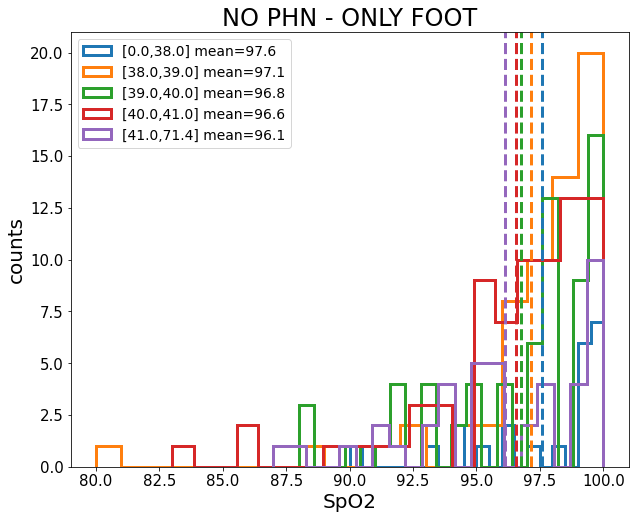

In [16]:
plot_hist_split('MED_SPO2',select=(T['MED_SPO2']>10)& (T['PHN']==0) & (T['FOOT']==1))
plt.xlabel('SpO2')
plt.title('NO PHN - ONLY FOOT')
plt.show()

24
69
67
79
40


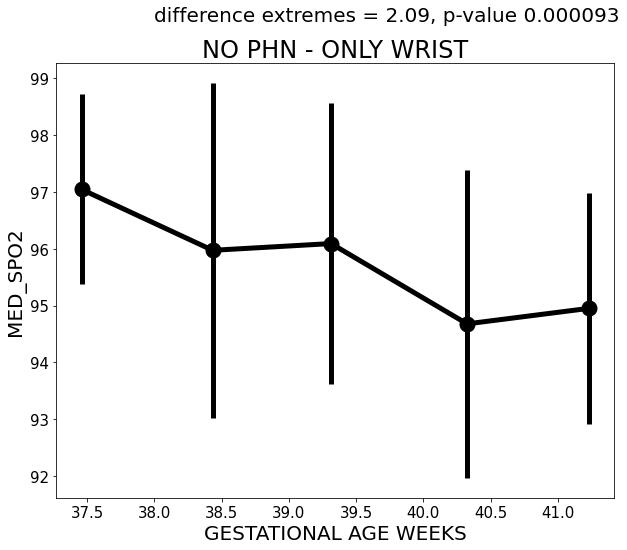

In [17]:
plot_graph_split('MED_SPO2',select=(T['MED_SPO2']>10)& (T['PHN']==0) & (T['WRIST']==1),running_prop='GEST_AGE_DAYS')
plt.title('NO PHN - ONLY WRIST')
plt.xlabel('GESTATIONAL AGE WEEKS')
plt.show()

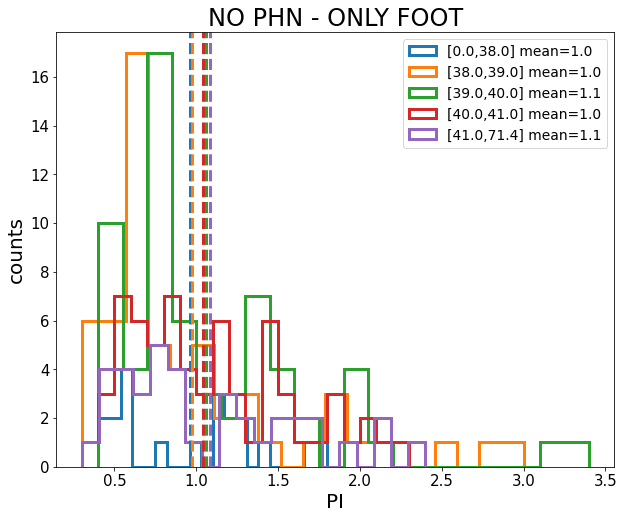

In [18]:
plot_hist_split('MED_PI',select=(T['MED_PI']>0.)& (T['PHN']==0) & (T['FOOT']==1))
plt.xlabel('PI')
plt.title('NO PHN - ONLY FOOT')
plt.show()

In [19]:
# This means single baby!
len(T[(T['PHN']==0) & (T['FOOT']==1)])

268

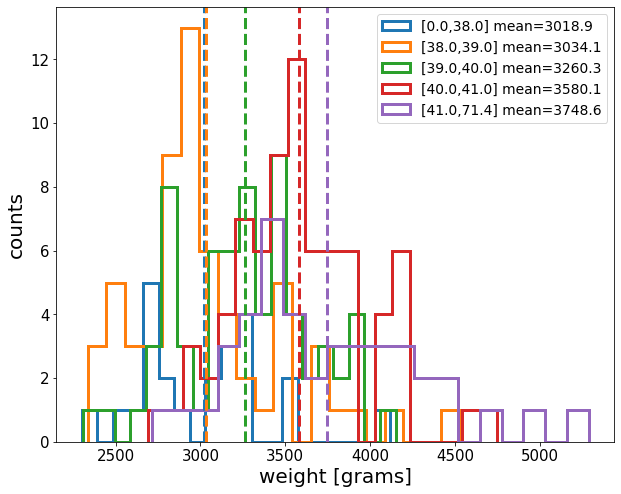

In [20]:
plot_hist_split('WEIGHT_GRAMS',select=( (T['PHN']==0) & (T['FOOT']==1)))
plt.xlabel('weight [grams]')
#plt.title('NO PHN - ONLY FOOT')
plt.show()

23
61
67
75
42


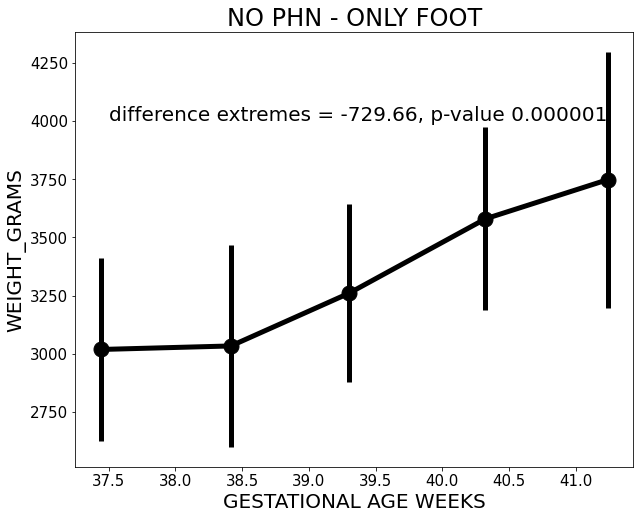

In [23]:
plot_graph_split('WEIGHT_GRAMS',select=( (T['PHN']==0) & (T['FOOT']==1)),running_prop='GEST_AGE_DAYS',txt_y=4000,txt_x=37.5)
plt.title('NO PHN - ONLY FOOT')
plt.xlabel('GESTATIONAL AGE WEEKS')
plt.show()

# Just checking two distribution

In [24]:
sel_smal_GA = (T['GEST_AGE_DAYS']<39.*7) & (T['PHN']==0) & (T['FOOT']==1) & (T['MED_SPO2']>10)
sel_big_GA  = (T['GEST_AGE_DAYS']>40.*7) & (T['PHN']==0) & (T['FOOT']==1) & (T['MED_SPO2']>10)

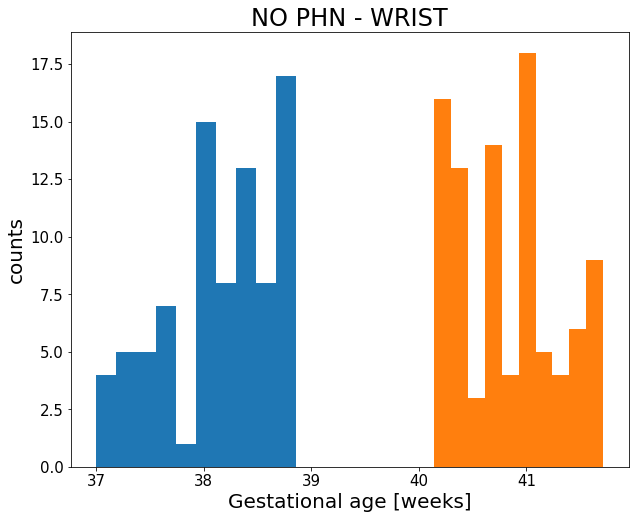

In [25]:
plt.figure(figsize=(10,8))
plt.hist(T['GEST_AGE_DAYS'][sel_smal_GA]/7.)
plt.hist(T['GEST_AGE_DAYS'][sel_big_GA]/7.)
plt.xlabel('Gestational age [weeks]')
plt.ylabel('counts')
plt.title('NO PHN - WRIST')
plt.show()

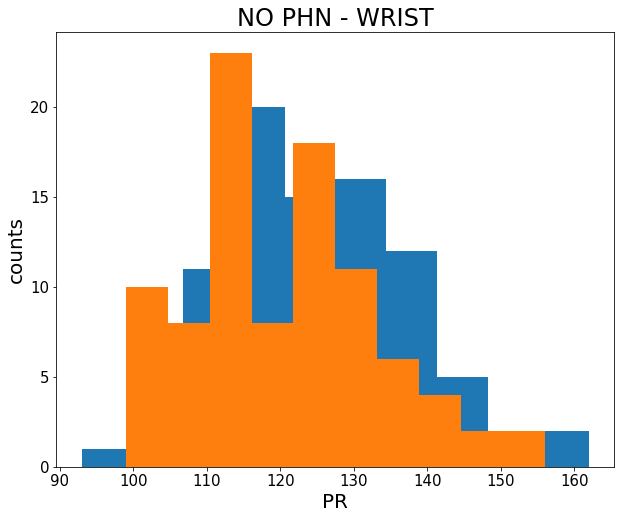

In [26]:
plt.figure(figsize=(10,8))
plt.hist(T['MED_PR'][sel_smal_GA])
plt.hist(T['MED_PR'][sel_big_GA])
plt.xlabel('PR')
plt.ylabel('counts')
plt.title('NO PHN - WRIST')
plt.show()

In [69]:
def compare2samples(data1,data2,txt_x=100,txt_y=10,density=False):
    fig = plt.figure(figsize=(10,8))
    plt.hist(data1,bins=20,histtype='step',lw=4,color='C0',density=density)
    plt.hist(data2,bins=20,histtype='step',lw=4,color='C1',density=density)
    plt.axvline(np.mean(data1),ls='dashed',lw=5,color='C0')
    plt.axvline(np.mean(data2),ls='dashed',lw=5,color='C1')
    plt.text(txt_x,txt_y,'mean1 = %.2f (#%i)\nmean2 = %.2f(#%i)\nstd1 = %.2f\nstd2 = %.2f'%(np.mean(data1),len(data1),np.mean(data2),len(data2),np.std(data1),np.std(data2)))

    plt.title('difference extremes = %.2f, p-value %.6f'%(np.mean(data1)-np.mean(data2),ss.ttest_ind(data1,data2)[1]))
    return fig

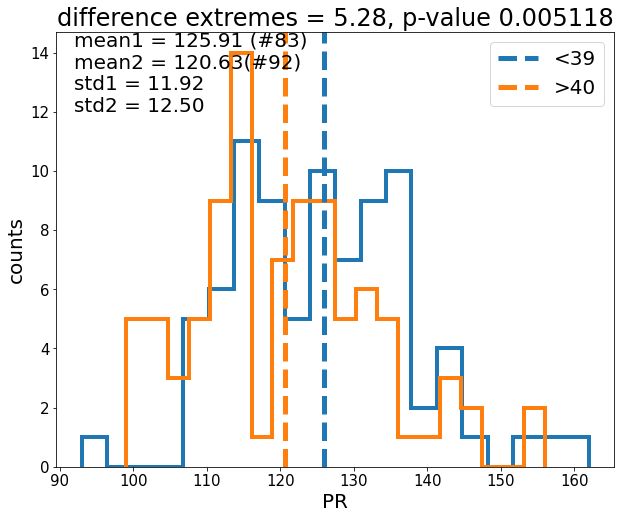

In [28]:
compare2samples(T['MED_PR'][sel_smal_GA],T['MED_PR'][sel_big_GA],txt_x=92,txt_y=12)
plt.legend(['<39','>40'])
plt.xlabel('PR')
plt.ylabel('counts')
plt.show()

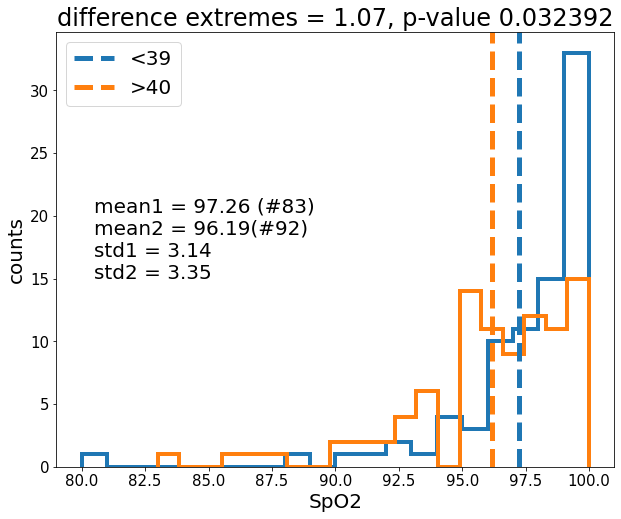

In [31]:
compare2samples(T['MED_SPO2'][sel_smal_GA],T['MED_SPO2'][sel_big_GA],txt_x=80.5,txt_y=15)
plt.legend(['<39','>40'])
plt.xlabel('SpO2')
plt.ylabel('counts')
plt.show()

/home/giorgio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/giorgio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/giorgio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/giorgio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


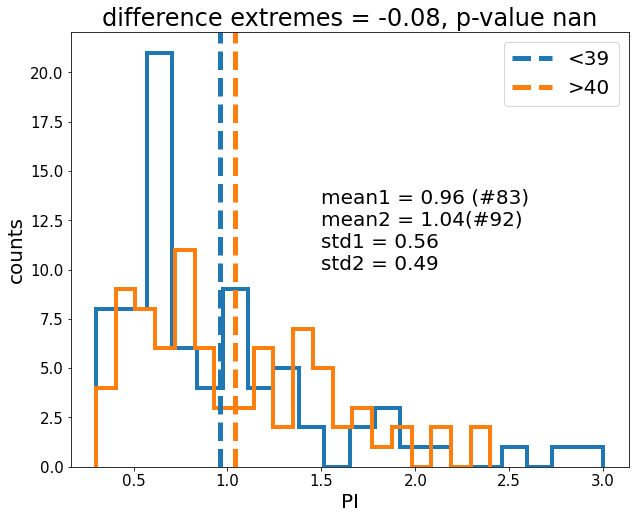

In [32]:
compare2samples(T['MED_PI'][sel_smal_GA],T['MED_PI'][sel_big_GA],txt_x=1.5,txt_y=10)
plt.legend(['<39','>40'])
plt.xlabel('PI')
plt.ylabel('counts')
plt.show()

# Plots as a function of time

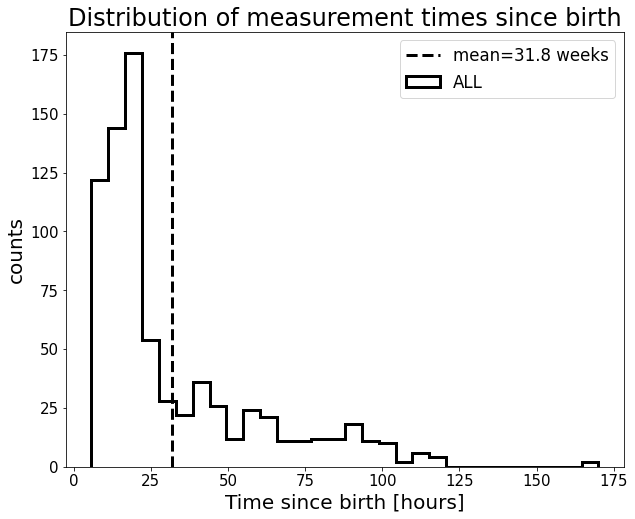

In [34]:
fig,ax = plt.subplots(figsize=(10,8))

quantity = np.array(T['DELTA_SEC_MEASURE'])/60./60.

ax.hist(quantity,bins=30,histtype='step',lw=3,color='k',label='ALL')
ax.axvline(np.mean(quantity),color='k',ls='dashed',lw=3,label='mean=%.1f weeks'%(np.mean(quantity)))
ax.set_xlabel('Time since birth [hours]')
ax.set_ylabel('counts')

plt.title('Distribution of measurement times since birth')


plt.legend(fontsize='small')
plt.show()

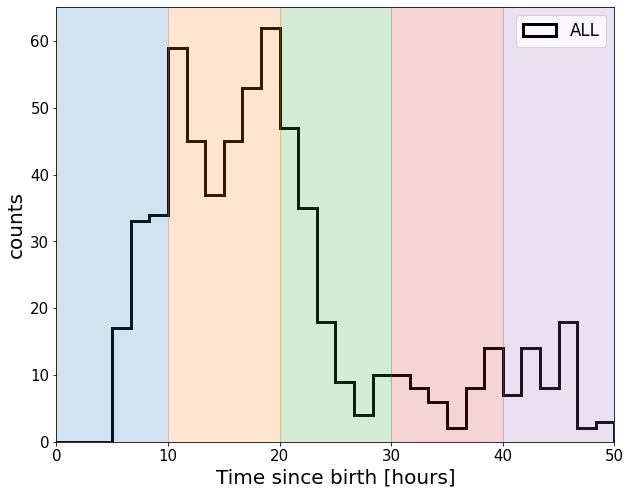

In [35]:
fig,ax = plt.subplots(figsize=(10,8))

quantity = np.array(T['DELTA_SEC_MEASURE'])/60./60.

ax.hist(quantity,bins=30,histtype='step',lw=3,color='k',label='ALL',range=(0,50))
#ax.axvline(np.mean(quantity),color='k',ls='dashed',lw=3,label='mean=%.1f weeks'%(np.mean(quantity)))
ax.set_xlabel('Time since birth [hours]')
ax.set_ylabel('counts')


ax.axvspan(0, 10, alpha=0.2, color='C0')
ax.axvspan(10, 20, alpha=0.2, color='C1')
ax.axvspan(20, 30, alpha=0.2, color='C2')
ax.axvspan(30, 40, alpha=0.2, color='C3')
ax.axvspan(40, 100, alpha=0.2, color='C4')

plt.xlim(0,50)
plt.legend(fontsize='small')
plt.show()

In [36]:
slots_hour = [0.,10,20,30,40,100.]
#slots_hour = [0.,50,100.]

In [37]:
sel_delta_t = []

DELTA_HOURS = np.array(T['DELTA_SEC_MEASURE'])/60./60.

for i in range(len(slots_hour)-1):
    sel_delta_t.append((DELTA_HOURS>= slots_hour[i])&(DELTA_HOURS< slots_hour[i+1]))


In [38]:
for i in range(len(slots_hour)-1):
    print('MEAN VALUES %i < delta_t <  %i [hours]'%(slots_hour[i],slots_hour[i+1]))
    print('##################################')
    print(T[sel_delta_t[i]].mean())
    print('\n')

MEAN VALUES 0 < delta_t <  10 [hours]
##################################
WEIGHT_GRAMS          3426.857143
GEST_AGE_DAYS          277.095238
DELTA_SEC_MEASURE    28147.547619
MED_SPO2                96.321429
MED_PR                 115.434524
MED_PI                   1.136250
PHN                      0.000000
WRIST                    0.500000
FOOT                     0.440476
dtype: float64


MEAN VALUES 10 < delta_t <  20 [hours]
##################################
WEIGHT_GRAMS          3348.016611
GEST_AGE_DAYS          277.132890
DELTA_SEC_MEASURE    54513.378738
MED_SPO2                96.365449
MED_PR                 121.943522
MED_PI                   1.169534
PHN                      0.013289
WRIST                    0.485050
FOOT                     0.481728
dtype: float64


MEAN VALUES 20 < delta_t <  30 [hours]
##################################
WEIGHT_GRAMS          3256.162602
GEST_AGE_DAYS          275.512195
DELTA_SEC_MEASURE    82956.422764
MED_SPO2                94.9878

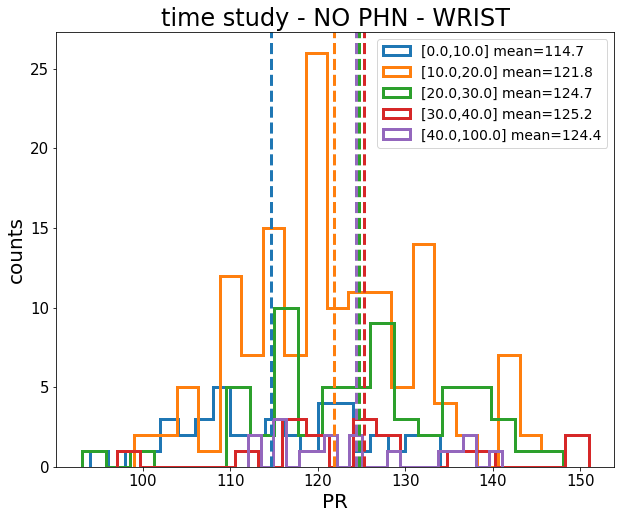

In [39]:
plot_hist_split(prop='MED_PR',select=((T['MED_PR']>10)& (T['PHN']==0) & (T['WRIST']==1)),running_sel=sel_delta_t,slots=slots_hour)
plt.title('time study - NO PHN - WRIST')
plt.xlabel('PR')
plt.show()

42
144
60
16
17


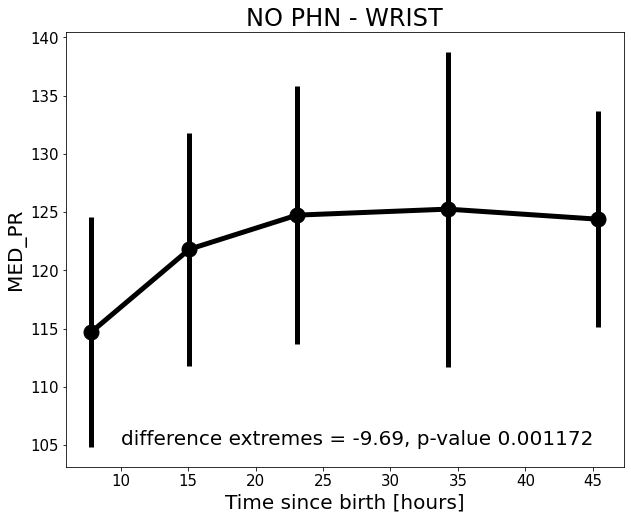

In [40]:
plot_graph_split(prop='MED_PR',select=((T['MED_PR']>10)& (T['PHN']==0) & (T['WRIST']==1)),running_sel=sel_delta_t,slots=slots_hour,running_prop='DELTA_SEC_MEASURE',txt_y=105,txt_x=10,conversion=1/60./60.)
plt.xlabel('Time since birth [hours]')
plt.title('NO PHN - WRIST')
plt.show()


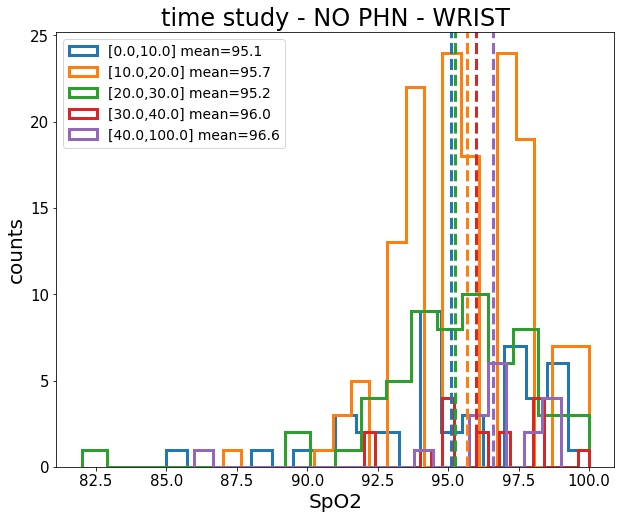

In [41]:
plot_hist_split(prop='MED_SPO2',select=((T['MED_SPO2']>10)& (T['PHN']==0) & (T['WRIST']==1)),running_sel=sel_delta_t,slots=slots_hour)
plt.title('time study - NO PHN - WRIST')
plt.xlabel('SpO2')
plt.show()

42
144
60
16
17


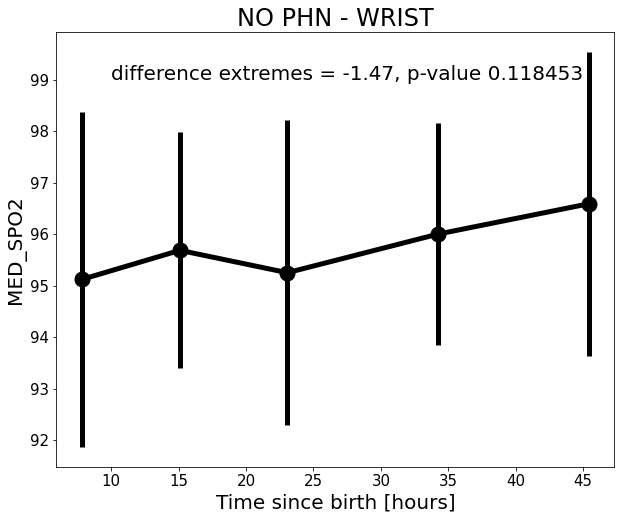

In [42]:
plot_graph_split(prop='MED_SPO2',select=((T['MED_SPO2']>10)& (T['PHN']==0) & (T['WRIST']==1)),running_sel=sel_delta_t,slots=slots_hour,running_prop='DELTA_SEC_MEASURE',conversion=1/60./60.,txt_x=10,txt_y=99.)
plt.xlabel('Time since birth [hours]')
plt.title('NO PHN - WRIST')
plt.show()


37
143
57
13
17


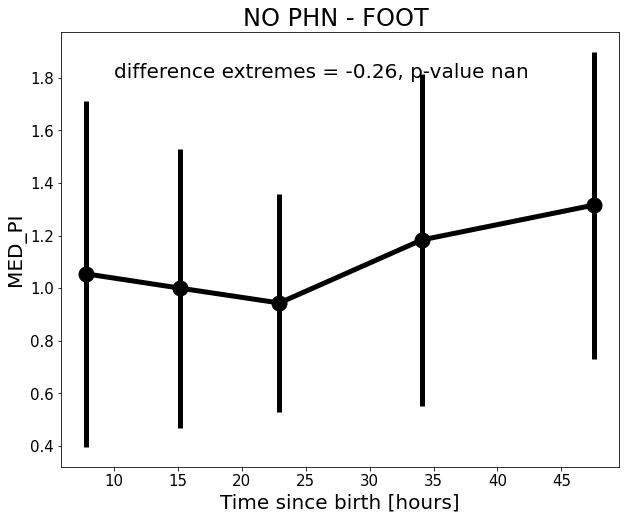

In [43]:
plot_graph_split(prop='MED_PI',select=((T['MED_SPO2']>10)& (T['PHN']==0) & (T['FOOT']==1)),running_sel=sel_delta_t,slots=slots_hour,running_prop='DELTA_SEC_MEASURE',conversion=1/60./60.,txt_x=10,txt_y=1.8)

plt.xlabel('Time since birth [hours]')
plt.title('NO PHN - FOOT ')


plt.show()


42
144
60
16
17


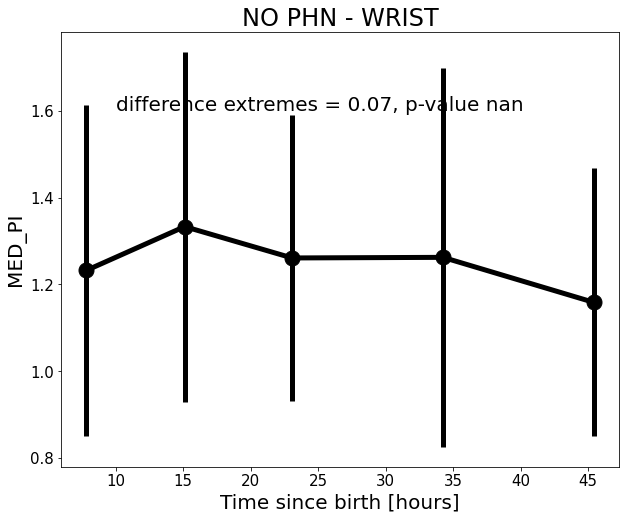

In [44]:
plot_graph_split(prop='MED_PI',select=((T['MED_SPO2']>10)& (T['PHN']==0) & (T['WRIST']==1)),running_sel=sel_delta_t,slots=slots_hour,running_prop='DELTA_SEC_MEASURE',conversion=1/60./60.,txt_x=10,txt_y=1.6)
plt.xlabel('Time since birth [hours]')
plt.title('NO PHN - WRIST')
plt.show()

# Checking babies < 24 h an > 24 h

In [138]:
sel_smal_time = (T['DELTA_SEC_MEASURE']<=24.*60*60) & (T['WRIST']==1) & (T['MED_SPO2']>10) #& (T['PHN']==0) 
sel_big_time  = (T['DELTA_SEC_MEASURE']>24.*60*60) & (T['WRIST']==1) & (T['MED_SPO2']>10) #& (T['PHN']==0) 

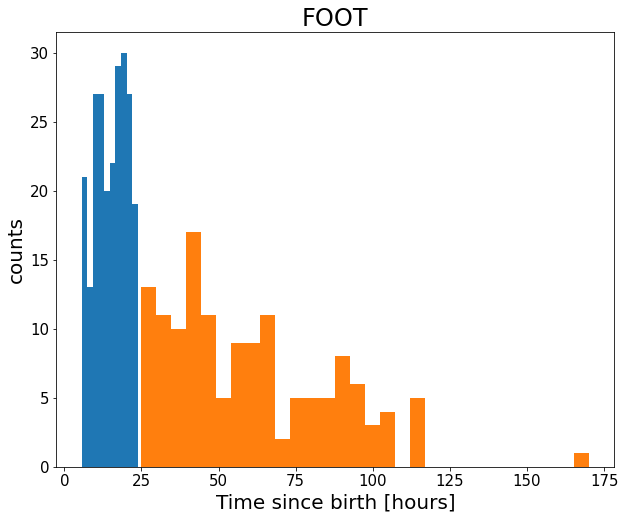

In [139]:
plt.figure(figsize=(10,8))
plt.hist(T['DELTA_SEC_MEASURE'][sel_smal_time]/60/60.)
plt.hist(T['DELTA_SEC_MEASURE'][sel_big_time]/60/60.,bins=30)
plt.xlabel('Time since birth [hours]')
plt.ylabel('counts')
plt.title('FOOT')
plt.show()

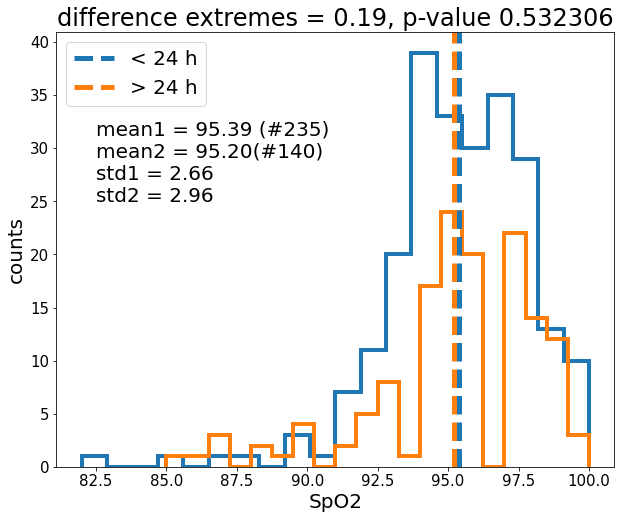

In [140]:
compare2samples(T['MED_SPO2'][sel_smal_time],T['MED_SPO2'][sel_big_time],density=False,txt_y=25,txt_x=82.5)
plt.xlabel('SpO2')
plt.ylabel('counts')
plt.legend(['< 24 h','> 24 h'],loc=2)
plt.show()

# Simple plot of SpO2 vs time since birth

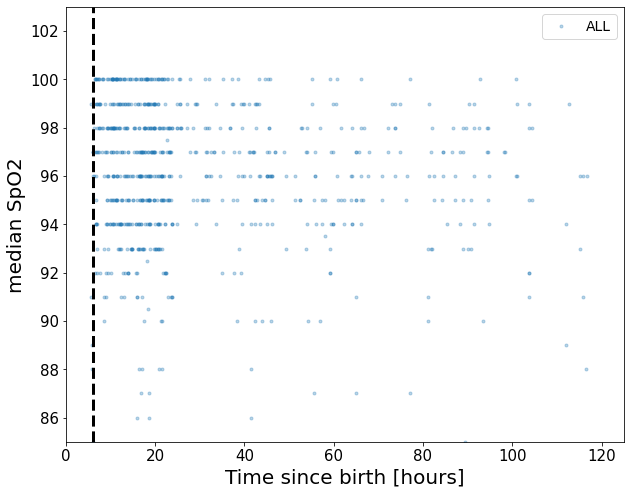

In [45]:
plt.figure(figsize=(10,8))
plt.plot(T['DELTA_SEC_MEASURE']/60/60,T['MED_SPO2'],".",label='ALL',alpha=0.3)
#plt.plot(g_delta_t_hours[g_spo2_median>10.],g_spo2_median[g_spo2_median>10.],"oC1",label='GIRLS ('+str(len(g_spo2_median))+' measurements)',alpha=1.,markersize=10)
#plt.plot(b_delta_t_hours[b_spo2_median>10.],b_spo2_median[b_spo2_median>10.],"xC2",label='BOYS ('+str(len(b_spo2_median))+' measurements)',alpha=1.,markersize=7)

#plt.plot(ttg,xxg,lw=4,color='r',label='median girl')
#plt.plot(ttg,xxg,".",lw=4,color='r',markersize=10)
#plt.plot(ttb,xxb,lw=4,color='b',label='median boy')
#plt.plot(ttb,xxb,".",lw=4,color='b',markersize=10)

plt.ylim(85,103)
plt.xlim(0,125)
plt.xlabel('Time since birth [hours]')
plt.ylabel('median SpO2')
plt.axvline(6,color='k',ls='dashed',lw=3)
#plt.title('FOOT ')
plt.legend(fontsize='x-small')
#plt.savefig('../plots/003/SpO2_vs_time_boysgirls_wrist.png')
plt.show()

# Checking the distribution of PI  for wrist and foot

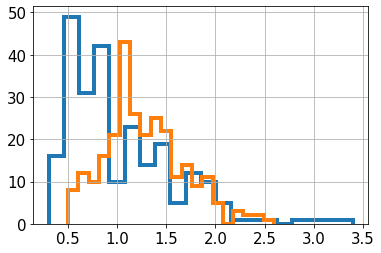

1.0296296296296297
1.287404580152672
median1 =  0.9
median2 =  1.2
0.5483483118021258
0.3857600563144459
iqr1 =  0.7000000000000001
iqr2 =  0.5
-0.2577749505230422


In [54]:
data1 = T['MED_PI'][(T['FOOT']==1)&(T['MED_PI']>0.1)&(T['PHN']==0) ]
data2 = T['MED_PI'][(T['WRIST']==1)&(T['MED_PI']>0.1)&(T['PHN']==0) ]
#T['MED_PI'][T['FOOT']==1 ].hist(histtype='step',lw=4,bins=30)
#T['MED_PI'][T['WRIST']==1 ].hist(histtype='step',lw=4,bins=30)

data1.hist(histtype='step',lw=4,bins=20)
data2.hist(histtype='step',lw=4,bins=20)
plt.show()


print(np.mean(data1))
print(np.mean(data2))
print('median1 = ',np.median(data1))
print('median2 = ',np.median(data2))
print(np.std(data1))
print(np.std(data2))
print('iqr1 = ',ss.iqr(data1))
print('iqr2 = ',ss.iqr(data2))

print(np.mean(data1)-np.mean(data2))

## T-student test for PI value foot / wrist

In [47]:
ss.ttest_ind(data1[~np.isnan(data1)],data2[~np.isnan(data2)])

Ttest_indResult(statistic=-6.13220946157384, pvalue=1.7544920366955218e-09)

In [55]:
len(data2[~np.isnan(data2)])

262

In [56]:
len(data2)

262

In [57]:
len(data1[~np.isnan(data1)])

243

In [58]:
len(data1)

243

In [59]:
ss.ttest_ind(data1,data2)

Ttest_indResult(statistic=-6.13220946157384, pvalue=1.7544920366955218e-09)